In [15]:
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.basemap import Basemap
#!{sys.executable} -m pip install basemap-1.2.1-cp37-cp37m-win_amd64.whl

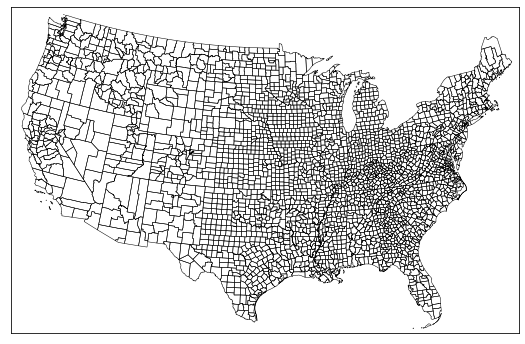

In [32]:
plt.figure(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('cb_2018_us_county_5m/cb_2018_us_county_5m','county',drawbounds=True)
cmap = plt.cm.get_cmap('seismic')

In [21]:
help(m)

Help on Basemap in module mpl_toolkits.basemap object:

class Basemap(builtins.object)
 |  Basemap(llcrnrlon=None, llcrnrlat=None, urcrnrlon=None, urcrnrlat=None, llcrnrx=None, llcrnry=None, urcrnrx=None, urcrnry=None, width=None, height=None, projection='cyl', resolution='c', area_thresh=None, rsphere=6370997.0, ellps=None, lat_ts=None, lat_1=None, lat_2=None, lat_0=None, lon_0=None, lon_1=None, lon_2=None, o_lon_p=None, o_lat_p=None, k_0=None, no_rot=False, suppress_ticks=True, satellite_height=35786000, boundinglat=None, fix_aspect=True, anchor='C', celestial=False, round=False, epsg=None, ax=None)
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x, y, inverse=False)
 |      Calling a Basemap class instance with the arguments lon, lat will
 |      convert lon/lat (in degrees) to x/y map projection
 |      coordinates (in meters).  If optional keyword ``inverse`` is
 |      True (default is False), the inverse transformation from x/y
 |      to lon/lat is performed.
 |      
 |

dict_items([('STATEFP', '39'),
('COUNTYFP', '071'),
('COUNTYNS', '01074048'),
('AFFGEOID', '0500000US39071'),
('GEOID', '39071'),
('NAME', 'Highland'),
('LSAD', '06'),
('ALAND', 1432479992),
('AWATER', 12194983),
('RINGNUM', 1),
('SHAPENUM', 1)])

(3233,
 5,
 [-179.14733999999999, -14.552548999999999, 0.0, 0.0],
 [179.77847, 71.352561, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x20d8c71bbc8>)

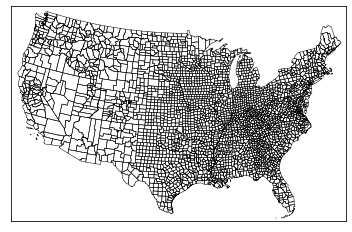

In [102]:
import pandas as pd
d_educ=pd.read_csv("test_education.csv")
d_educ["FIPS"]=[(5-len(str(i)))*"0"+str(i) for i in d_educ["FIPS"]]
d_educ.columns=['FIPS', 'RC_2003', 'UI_2003','RC_2013', 'UI_2013','leq_HS','HS','AD','BD',
                'leq_HS_percent','HS_percent','AD_percent','BD_percent']

In [159]:
max(d_educ["BD_percent"])

74.6

(59562.44463492063, 681007.4899695672, 78950.67276517022, 485731.35825242894)

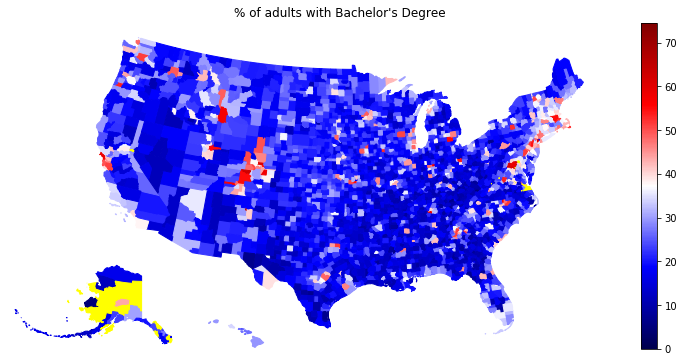

In [163]:
temp_set=set()
plt.figure(figsize=(12,6))
max_BD_percent=max(d_educ["BD_percent"])
min_BD_percent=min(d_educ["BD_percent"])

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('cb_2018_us_county_5m/cb_2018_us_county_5m','counties',drawbounds=False)
for polygon,info in zip(m.counties,m.counties_info):
    if info["STATEFP"] in ["15","02","78","72","66","60","69"]:
        pass
    else:
        temp_set.add(info["STATEFP"])
        temp_FIPS=info["STATEFP"]+info["COUNTYFP"]
        xdata,ydata=zip(*polygon)
        try:
            value=round((d_educ[d_educ["FIPS"]==temp_FIPS]["BD_percent"].values[0]-min_BD_percent)/(max_BD_percent-min_BD_percent),3)
            #print("value: ",value)
            if value > 0 and value < 1:
                plt.fill(xdata,ydata,color=cmap(value),edgecolor='white')
        except IndexError:
            plt.fill(xdata,ydata,color="yellow",edgecolor='white')
    #skips Hawaii(drawn separately), DC(no data), and Alaska(drawn separately)
    #if info['NAME'] != 'Hawaii' and info['NAME'] != 'District of Columbia' and info['NAME'] != 'Alaska':
    #    a=state_key[info['NAME']]
    #    #of the many ways to normalize, I used (x-min)/(max-min) by the suggestion of the instructor in piazza post
    #    plt.fill(xdata,ydata,color=cmap((temp_dict[year-1895][a]-min_temp)/(max_temp-min_temp)),edgecolor='b')
    #    print(info['NAME'],(temp_dict[year-1895][a]-min_temp)/(max_temp-min_temp))
#plt.title('Change in Average Temperatures from {} to {}'.format(year,year+1)) 
plt.axis('off')
plt.title("% of adults with Bachelor's Degree")
sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=min_BD_percent,vmax=max_BD_percent))
plt.colorbar(sm) 

plt.axes([0.05,0.1275,0.2,0.2])
alas = Basemap(llcrnrlon=-168,llcrnrlat=51,urcrnrlon=-120,urcrnrlat=71.1,projection='lcc',lat_1=52,lat_2=67,lon_0=-141)
alas.readshapefile('cb_2018_us_county_5m/cb_2018_us_county_5m','counties',drawbounds=False)
for polygon,info in zip(alas.counties,alas.counties_info):
    if info["STATEFP"] != "02":
        pass
    else:
        temp_FIPS=info["STATEFP"]+info["COUNTYFP"]
        xdata,ydata=zip(*polygon)
        try:
            value=round((d_educ[d_educ["FIPS"]==temp_FIPS]["BD_percent"].values[0]-min_BD_percent)/(max_BD_percent-min_BD_percent),3)
            #print("value: ",value)
            if value > 0 and value < 1:
                plt.fill(xdata,ydata,color=cmap(value),edgecolor='black')
        except IndexError:
            plt.fill(xdata,ydata,color="yellow",edgecolor='white')            
plt.axis('off')


plt.axes([0.28,0.125,0.07,0.07])
hawaii = Basemap(llcrnrlon=-161,llcrnrlat=18,urcrnrlon=-154,urcrnrlat=23,projection='lcc',lat_1=19,lat_2=22,lon_0=-157)
hawaii.readshapefile('cb_2018_us_county_5m/cb_2018_us_county_5m','counties',drawbounds=False)
for polygon,info in zip(hawaii.counties,hawaii.counties_info):
    if info["STATEFP"] != "15":
        pass
    else:
        temp_FIPS=info["STATEFP"]+info["COUNTYFP"]
        xdata,ydata=zip(*polygon)
        try:
            value=round((d_educ[d_educ["FIPS"]==temp_FIPS]["BD_percent"].values[0]-min_BD_percent)/(max_BD_percent-min_BD_percent),3)
            #print("value: ",value)
            if value > 0 and value < 1:
                plt.fill(xdata,ydata,color=cmap(value),edgecolor='black')
        except IndexError:
            plt.fill(xdata,ydata,color="yellow",edgecolor='white')            
plt.axis('off')
